# Data Generation for Training Models

Use this notebook first to randomly generate logs for the machine learning models to train on. Pulls classes & algorithms from Classes.py

In [4]:
#Import all necessary modules. Including classes (Robot & Controller) and consensus Algorithm being used
import os
import json
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from Classes import Controller, Robot
from Utils import setup_simulation, pbft_majority_consensus

In [6]:
# --- Batch Run Variables ---
NUM_RUNS = 100 
FIELD_WIDTH = 100
FIELD_HEIGHT = 100
TOKENS_PER_RUN = 200
ROBOTS_PER_RUN = 25
SIM_DURATION_SECONDS = 200
COMM_INTERVAL = 5 # Seconds between each signal sent between Robot & Controller
RANDOMIZE = True # Whether robot starting positions are random in the field
MOVEMENT_RANGE = 10 # Range of movement in cardinal directions (10 represents 5 in each direction)
SCAN_RANGE = 5 # Scan range - direct value. All tokens within SCAN_RANGE units can be seen

BYZANTINE_PERCENT_RANGE = (0.00, 0.5)  # Percent byzantine range. Default is 0% to 50% so there is a large range of possible percentages

# Define consensus algorithm being used
consensus_algorithm = pbft_majority_consensus

[]


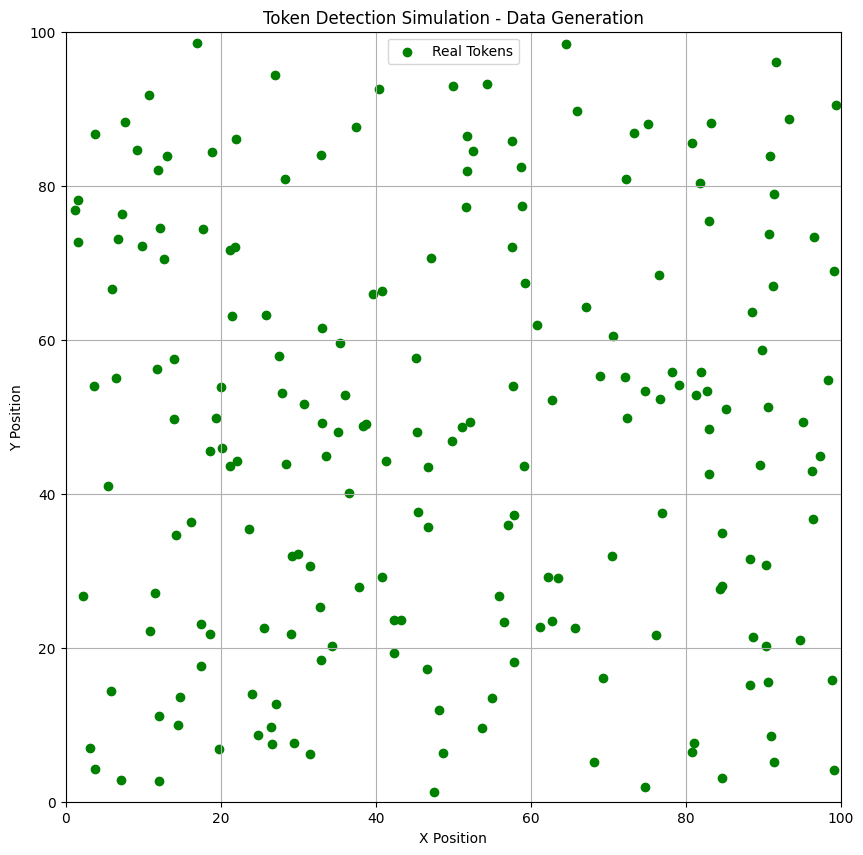

In [10]:
# --- Testing ---
# Test the run to make sure the duration is not too long (below .3 should have high consensus and above should be significantly lower)

tokens, robots = setup_simulation(FIELD_WIDTH, FIELD_HEIGHT, TOKENS_PER_RUN, ROBOTS_PER_RUN, RANDOMIZE, MOVEMENT_RANGE, SCAN_RANGE, .0)
controller = Controller(robots, SIM_DURATION_SECONDS, COMM_INTERVAL, consensus_algorithm, False)
for robot in robots:
    robot.token_list = tokens 
final_tokens = controller.run()

real_tokens = np.array(tokens)
found_tokens = np.array(final_tokens)

plt.figure(figsize=(10, 10))
plt.scatter(real_tokens[:,0], real_tokens[:,1], c='green', label='Real Tokens')
if len(found_tokens) > 0:
    plt.scatter(found_tokens[:,0], found_tokens[:,1], c='red', marker='x', label='Detected Tokens')
plt.xlim(0, FIELD_WIDTH)
plt.ylim(0, FIELD_HEIGHT)
plt.legend()
plt.title('Token Detection Simulation - Data Generation')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.show()

In [3]:
# Output folder where log files are stored
output_folder = "training_logs"
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
os.makedirs(output_folder)

In [4]:
# Run & generate NUM_RUNS number of logs
for run_id in range(NUM_RUNS):
    # Randomize Byzantine rate for each run
    percent_byzantine = random.uniform(*BYZANTINE_PERCENT_RANGE)

    # Set up environment
    tokens, robots = setup_simulation(FIELD_WIDTH, FIELD_HEIGHT, TOKENS_PER_RUN, ROBOTS_PER_RUN, RANDOMIZE, MOVEMENT_RANGE, SCAN_RANGE, percent_byzantine)

    # Create a new Controller for each run
    controller = Controller(robots, SIM_DURATION_SECONDS, COMM_INTERVAL, consensus_algorithm, False)
    
    # Attach token list to robots
    for robot in robots:
        robot.token_list = tokens 

    final_tokens = controller.run()

    # Save communication logs
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f"communication_log_run_{run_id}_{timestamp}.json"
    filepath = os.path.join(output_folder, filename)

    with open(filepath, 'w') as f:
        json.dump(controller.communication_logs, f, indent=2)

    print(f"[{run_id+1}/{NUM_RUNS}] Run complete: {filename}")

[1/10] Run complete: communication_log_run_0_20250505_023846.json
[2/10] Run complete: communication_log_run_1_20250505_023912.json
[3/10] Run complete: communication_log_run_2_20250505_023936.json
[4/10] Run complete: communication_log_run_3_20250505_023958.json
[5/10] Run complete: communication_log_run_4_20250505_024021.json
[6/10] Run complete: communication_log_run_5_20250505_024047.json
[7/10] Run complete: communication_log_run_6_20250505_024111.json
[8/10] Run complete: communication_log_run_7_20250505_024134.json
[9/10] Run complete: communication_log_run_8_20250505_024158.json
[10/10] Run complete: communication_log_run_9_20250505_024223.json
